<a href="https://colab.research.google.com/github/ShivenTripathi/Dimensionality-Reduction-CGM/blob/main/Part_3/ColabNotebooks/VanillaDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CGM
!ls
# !gzip "/content/drive/MyDrive/CGM/dataset/HIGGS_6M.csv.gz" -d "/content/drive/MyDrive/CGM/dataset"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import seaborn as sns

In [ ]:
df=pd.read_csv("dataset/HIGGS_6M.csv")

# Preprocessing

* Standard Scaling
* Min Max Scaling

You can skip training, jump to the last cell to load from drive

In [ ]:
dataset = df.to_numpy()
X = dataset[:,1:]
Y = dataset[:,0].astype(int)
print(X[0],Y[0])
print(np.shape(X),np.shape(X[0]),np.shape(Y),np.shape(Y[0]))

[ 9.07542109e-01  3.29147279e-01  3.59411865e-01  1.49796987e+00
 -3.13009530e-01  1.09553063e+00 -5.57524920e-01 -1.58822978e+00
  2.17307615e+00  8.12581182e-01 -2.13641927e-01  1.27101457e+00
  2.21487212e+00  4.99993950e-01 -1.26143181e+00  7.32156157e-01
  0.00000000e+00  3.98700893e-01 -1.13893008e+00 -8.19110195e-04
  0.00000000e+00  3.02219898e-01  8.33048165e-01  9.85699654e-01
  9.78098392e-01  7.79732168e-01  9.92355764e-01  7.98342586e-01] 1
(5999999, 28) (28,) (5999999,) ()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
categorical=[0,9,13,17,21]

for index in range(28):
  X[:,index]=scaler.fit_transform(X[:,index].reshape(-1,1)).reshape(-1)

scaler = MinMaxScaler()
for index in range(28):
  X[:,index]=scaler.fit_transform(X[:,index].reshape(-1,1)).reshape(-1)

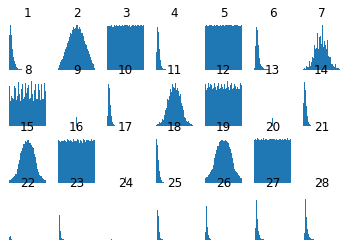

In [ ]:
fig, axes = plt.subplots(4,7)
for i in range(28):
  axes[i//7][i%7].hist(X[:,i],bins='auto')
  axes[i//7][i%7].set_title(str(i+1))
  axes[i//7][i%7].axis('off')

In [ ]:
test_size = 0.16
seed = 7
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=seed)

In [ ]:
print(np.shape(X_valid), np.shape(X_test), np.shape(X_train))

(480000, 28) (480000, 28) (5039999, 28)


In [ ]:
print(np.shape(y_valid), np.shape(y_test), np.shape(y_train))

(480000,) (480000,) (5039999,)


# Training on 4 layer DNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
baseline_history=model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
19688/19688 [==============================] - 126s 6ms/step - loss: 0.6120 - tp: 961280.4451 - fp: 456278.1753 - tn: 729168.8634 - fn: 373592.4901 - accuracy: 0.6555 - precision: 0.6615 - recall: 0.7244 - auc: 0.7147 - val_loss: 0.5424 - val_tp: 189863.0000 - val_fp: 69197.0000 - val_tn: 156320.0000 - val_fn: 64620.0000 - val_accuracy: 0.7212 - val_precision: 0.7329 - val_recall: 0.7461 - val_auc: 0.7975
Epoch 2/10
19688/19688 [==============================] - 124s 6ms/step - loss: 0.5509 - tp: 984008.5990 - fp: 363595.9309 - tn: 821614.4788 - fn: 351100.9651 - accuracy: 0.7156 - precision: 0.7295 - recall: 0.7363 - auc: 0.7897 - val_loss: 0.5277 - val_tp: 179385.0000 - val_fp: 54041.0000 - val_tn: 171476.0000 - val_fn: 75098.0000 - val_accuracy: 0.7310 - val_precision: 0.7685 - val_recall: 0.7049 - val_auc: 0.8122
Epoch 3/10
19688/19688 [==============================] - 124s 6ms/step - loss: 0.5386 - tp: 996465.9367 - fp: 353207.1808 - tn: 831561.4069 - fn: 339085.4495 -

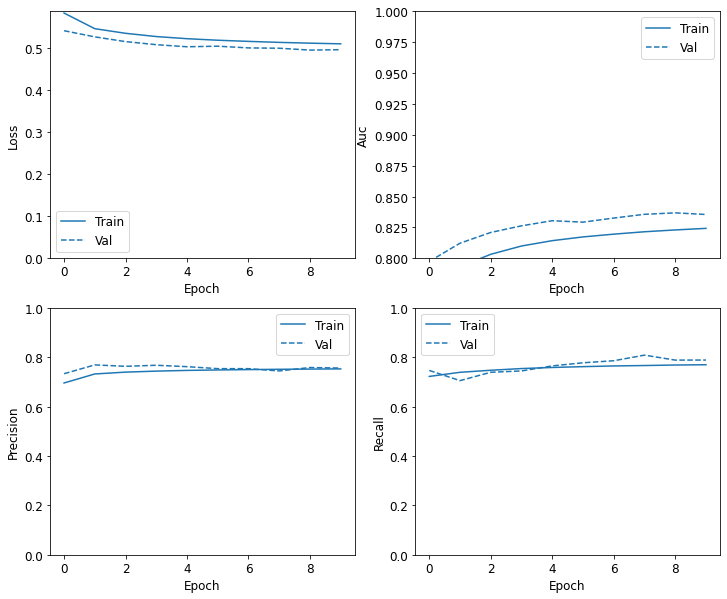

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

plot_metrics(baseline_history)

In [ ]:
BATCH_SIZE = 256

train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print(' (True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print(' (False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])

In [ ]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2,**kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  # plt.xlim([20,100])
  # plt.ylim([80,100])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

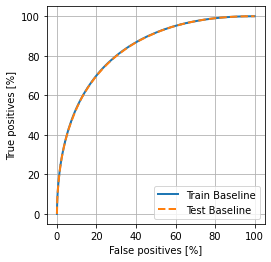

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import sklearn
plot_roc("Train Baseline",np.reshape(y_train,(np.shape(y_train)[0],1)),train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[1], linestyle='--')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save("DNN_model")

INFO:tensorflow:Assets written to: DNN_model/assets


# Load Model from Drive

In [ ]:
model = keras.models.load_model('DNN_model')
